<a href="https://colab.research.google.com/github/kryandhi/CreditRiskMLPrediction/blob/main/ProjectRakaminIDX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project ID/X Partners x Rakamin Data Scientist**

Komang Ryandhi Suandita

**Credit Risk Analysis and Prediction: Machine Learning Approaches for Informed Loan Decisions**

In [136]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler


In [69]:
df = pd.read_csv('https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv',low_memory=False)
print(df)

        Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83   

In [70]:
# 5 bagian pertama
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.shape

(466285, 75)

In [72]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [73]:
# deskripsi data
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [74]:
# Missing value
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isnull().sum(), round((df[col].isnull().sum()/len(df[col]))*100, 2), df[col].nunique(), list(df[col].drop_duplicates().sample(5,replace=True).values)]);

df_desc = pd.DataFrame(columns=['Column', 'Dtype', 'null count', 'null perc.', 'unique count', 'unique sample'],
                     data=listItem)
df_desc

,Column,Dtype,null count,null perc.,unique count,unique sample
0,Unnamed: 0,int64,0,0.00,466285,"[42464, 11354, 439695, 428227, 461368]"
1,id,int64,0,0.00,466285,"[11687733, 1354836, 28712825, 16062011, 29564427]"
2,member_id,int64,0,0.00,466285,"[8720042, 21910409, 696109, 33289548, 1451189]"
3,loan_amnt,int64,0,0.00,1352,"[13850, 14550, 725, 25600, 13100]"
4,funded_amnt,int64,0,0.00,1354,"[20725, 1675, 4050, 3550, 34975]"
...,...,...,...,...,...,...
70,all_util,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
71,total_rev_hi_lim,float64,70276,15.07,14612,"[27406.0, 128009.0, 420700.0, 20961.0, 177485.0]"
72,inq_fi,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
73,total_cu_tl,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"


In [75]:
# Check Missing Value
print('There are', df.isnull().sum().sum(), 'missing values')

There are 9776224 missing values


In [76]:
# Check Duplicated Value
print('There are', df.duplicated().sum(), 'duplicated value')

There are 0 duplicated value


1. EXPLORATORY DATA ANALYSIS

In [77]:
# Exploratory Data Analysis

num        = df.select_dtypes(exclude='object')
cat        = df.select_dtypes(include='object')
target     = df[['loan_status']]
num_column = num.columns
cat_column = cat.columns

1.1 Data Cleaning


In [78]:
# Copy the DataFrame
df_copy = df.copy()

In [79]:
df_copy.shape

(466285, 75)

In [80]:
# Drop column with missing values more than 70%
threshold = len(df_copy) * 0.7
df_clean = df_copy.dropna(axis=1, thresh=threshold)

In [81]:
# check value loan_status

df_clean.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [82]:
print('Our dataset has', df_copy.shape[0], 'rows and', df_copy.shape[1], 'columns.')

Our dataset has 466285 rows and 75 columns.


In [83]:
# check unique data type
datas_type = pd.DataFrame({'nunique': df_copy.nunique(), 'data type': df_copy.dtypes})
datas_type

,nunique,data type
Unnamed: 0,466285,int64
id,466285,int64
member_id,466285,int64
loan_amnt,1352,int64
funded_amnt,1354,int64
...,...,...
all_util,0,float64
total_rev_hi_lim,14612,float64
inq_fi,0,float64
total_cu_tl,0,float64


In [84]:
# Define the categories for Excellent loans and bad loans
excellent_loan_statuses = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_statuses = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# Create a new column 'loan_category' to classify loans as 'Excellent' or 'Bad'
df['loan_category'] = df['loan_status'].apply(lambda x: 'Excellent' if x in excellent_loan_statuses else 'Bad')
df_clean = pd.concat([df_clean, df['loan_category']], axis=1)

# Count the occurrences of each loan category
loan_category_counts = df['loan_category'].value_counts()

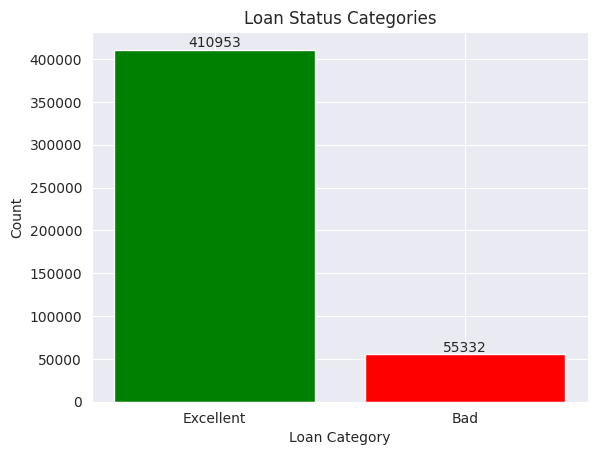

In [85]:
# Set colors for different loan categories
colors = ['green', 'red']

# Plot the distribution of loan categories
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.title('Loan Status Categories')

# Add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

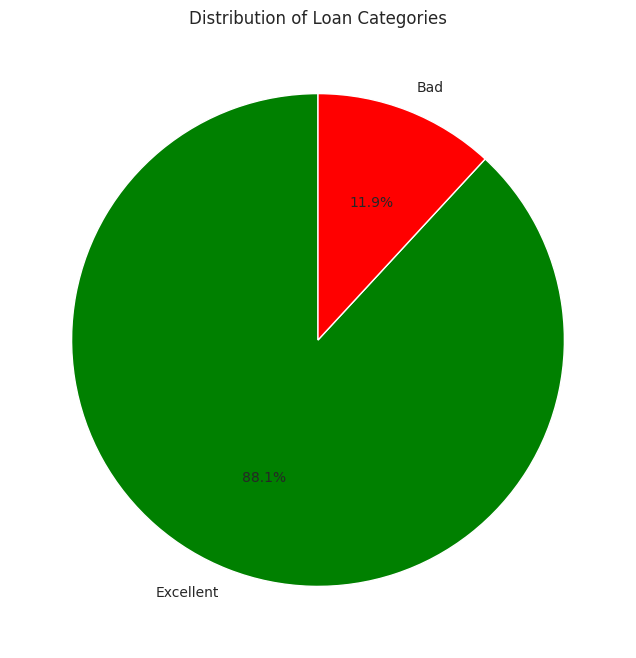

In [130]:
# Plot the distribution of loan categories using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_category_counts, labels=loan_category_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Loan Categories')

plt.show()

In [87]:
# Check remaining columns
df_clean.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_category'],
      dtype='object')

In [88]:
for column in df_clean.columns:
    value_counts = df_clean[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Unnamed: 0:
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: Unnamed: 0, Length: 466285, dtype: int64

Value counts for id:
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: id, Length: 466285, dtype: int64

Value counts for member_id:
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: member_id, Length: 466285, dtype: int64

Value counts for loan_amnt:
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: loan_amnt, Length: 1352, dtype: int64

Value counts for funded_amnt:
10000    32930
12000    25426
15000    23370
20000    22571
35000    16458
    

In [89]:
# Drop Unecessary Column
unused_col = ['policy_code', 'application_type', 'Unnamed: 0', 'id', 'member_id','issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'zip_code', 'title', 'emp_title','loan_status']

drop_data = df_clean[unused_col]

df_clean.drop(columns=unused_col, axis=1, inplace=True)

In [90]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.4,4.0,f,Sep-13,0.0,0.0,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.5,10.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37.0,f,Jan-15,0.0,0.0,NaN,NaN,NaN,Excellent
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,53.9,38.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent


1.2 Data Correlation

In [91]:
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq              

In [92]:
df_clean.duplicated().any()

False

<ipython-input-93-2a57302ea174>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


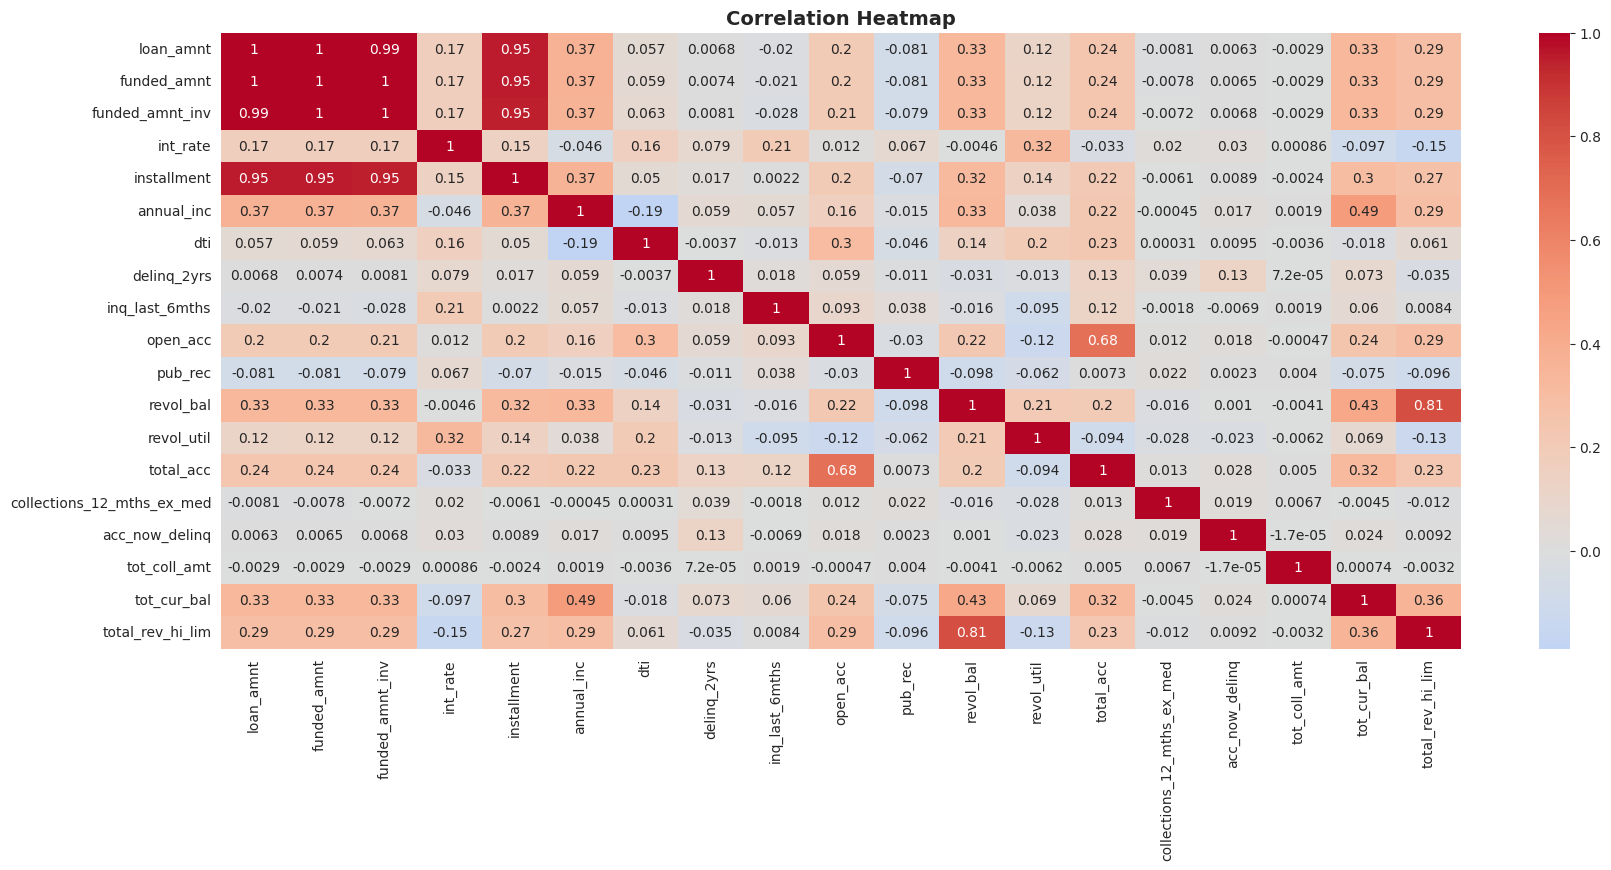

In [93]:
# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

In [94]:
# Similarity  Check
print(df_clean[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe())

           loan_amnt    funded_amnt  funded_amnt_inv
count  466285.000000  466285.000000    466285.000000
mean    14317.277577   14291.801044     14222.329888
std      8286.509164    8274.371300      8297.637788
min       500.000000     500.000000         0.000000
25%      8000.000000    8000.000000      8000.000000
50%     12000.000000   12000.000000     12000.000000
75%     20000.000000   20000.000000     19950.000000
max     35000.000000   35000.000000     35000.000000


In [95]:
unused_col2 = ['funded_amnt', 'funded_amnt_inv','url','pub_rec','installment', 'dti', 'revol_bal', 'total_acc','earliest_cr_line', 'last_credit_pull_d','initial_list_status','tot_coll_amt', 'sub_grade'
,'tot_cur_bal','total_rev_hi_lim','purpose', 'addr_state', ]
df_clean2 = df_clean.drop(columns = unused_col2)

In [96]:
df_clean2.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,delinq_2yrs,inq_last_6mths,open_acc,revol_util,collections_12_mths_ex_med,acc_now_delinq,loan_category
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Verified,0.0,1.0,3.0,83.7,0.0,0.0,Excellent
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,0.0,5.0,3.0,9.4,0.0,0.0,Bad
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,0.0,2.0,2.0,98.5,0.0,0.0,Excellent
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,0.0,1.0,10.0,21.0,0.0,0.0,Excellent
4,3000,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,0.0,0.0,15.0,53.9,0.0,0.0,Excellent


<ipython-input-97-b96a51c7d312>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean2.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'loan_amnt'),
  Text(0, 1.5, 'int_rate'),
  Text(0, 2.5, 'annual_inc'),
  Text(0, 3.5, 'delinq_2yrs'),
  Text(0, 4.5, 'inq_last_6mths'),
  Text(0, 5.5, 'open_acc'),
  Text(0, 6.5, 'revol_util'),
  Text(0, 7.5, 'collections_12_mths_ex_med'),
  Text(0, 8.5, 'acc_now_delinq')])

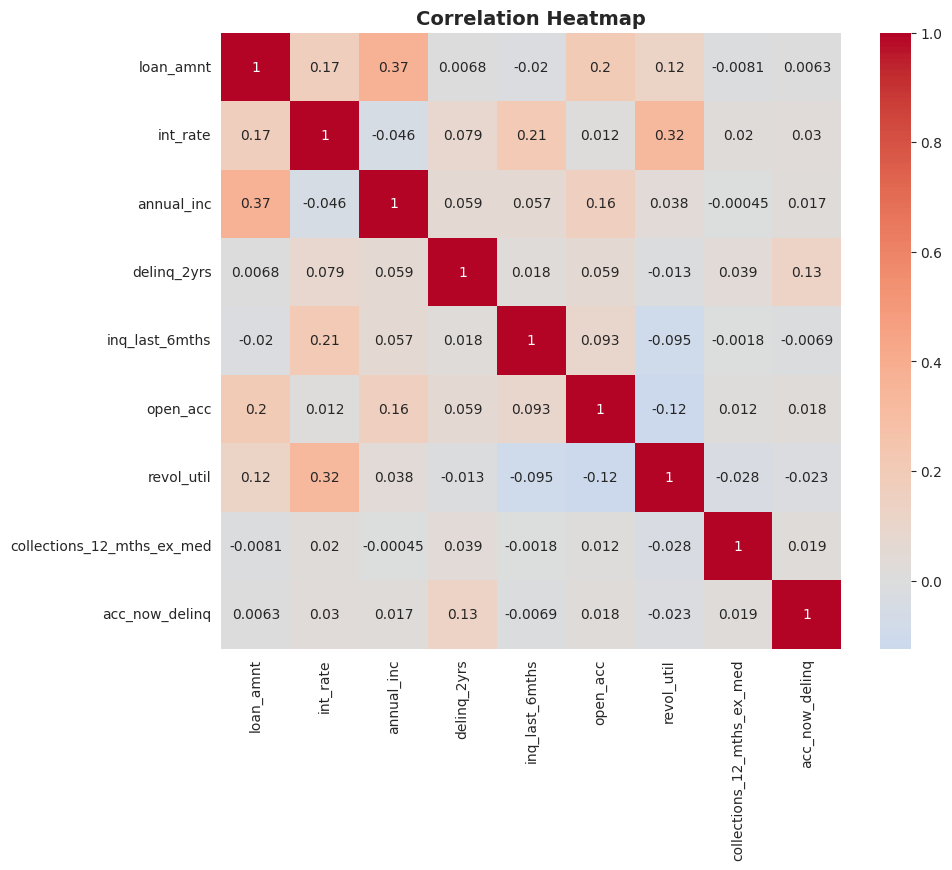

In [97]:
correlation_matrix = df_clean2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)


1.3 Object Data type

In [98]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  445277 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466281 non-null  float64
 7   verification_status         466285 non-null  object 
 8   delinq_2yrs                 466256 non-null  float64
 9   inq_last_6mths              466256 non-null  float64
 10  open_acc                    466256 non-null  float64
 11  revol_util                  465945 non-null  float64
 12  collections_12_mths_ex_med  466140 non-null  float64
 13  acc_now_delinq

In [99]:
df_clean2.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.00,0.00,1.00,33.00
open_acc,466256.0,11.187069,4.987526,0.00,8.00,10.00,14.00,84.00
revol_util,465945.0,56.176947,23.732628,0.00,39.20,57.60,74.70,892.30
collections_12_mths_ex_med,466140.0,0.009085,0.108648,0.00,0.00,0.00,0.00,20.00
acc_now_delinq,466256.0,0.004002,0.068637,0.00,0.00,0.00,0.00,5.00


In [100]:
df_clean2['term'] = df_clean2['term'].apply(lambda x: int(x.split()[0]))
df_clean2['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

2. MACHINE LEARNING MODELLING

2.1 Feature Encoding

In [101]:
encoded_verification = pd.get_dummies(df_clean2['verification_status'], prefix='verification', drop_first=True)
encoded_home_ownership = pd.get_dummies(df_clean2['home_ownership'], prefix='home', drop_first=True)
encoded_grade = pd.get_dummies(df_clean2['grade'], prefix='grade', drop_first=True)

# Combine the encoded features
encoded_categorical = pd.concat([encoded_verification,encoded_home_ownership, encoded_grade], axis=1)
df_clean2 = pd.concat([df_clean2, encoded_categorical], axis=1)

# Drop the original columns
df_clean2.drop(['verification_status','home_ownership', 'grade','term','emp_length'], axis=1, inplace=True)

In [102]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     466285 non-null  int64  
 1   int_rate                      466285 non-null  float64
 2   annual_inc                    466281 non-null  float64
 3   delinq_2yrs                   466256 non-null  float64
 4   inq_last_6mths                466256 non-null  float64
 5   open_acc                      466256 non-null  float64
 6   revol_util                    465945 non-null  float64
 7   collections_12_mths_ex_med    466140 non-null  float64
 8   acc_now_delinq                466256 non-null  float64
 9   loan_category                 466285 non-null  object 
 10  verification_Source Verified  466285 non-null  uint8  
 11  verification_Verified         466285 non-null  uint8  
 12  home_MORTGAGE                 466285 non-nul

In [103]:
df_clean2.head()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,revol_util,collections_12_mths_ex_med,acc_now_delinq,loan_category,...,home_NONE,home_OTHER,home_OWN,home_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000,10.65,24000.0,0.0,1.0,3.0,83.7,0.0,0.0,Excellent,...,0,0,0,1,1,0,0,0,0,0
1,2500,15.27,30000.0,0.0,5.0,3.0,9.4,0.0,0.0,Bad,...,0,0,0,1,0,1,0,0,0,0
2,2400,15.96,12252.0,0.0,2.0,2.0,98.5,0.0,0.0,Excellent,...,0,0,0,1,0,1,0,0,0,0
3,10000,13.49,49200.0,0.0,1.0,10.0,21.0,0.0,0.0,Excellent,...,0,0,0,1,0,1,0,0,0,0
4,3000,12.69,80000.0,0.0,0.0,15.0,53.9,0.0,0.0,Excellent,...,0,0,0,1,1,0,0,0,0,0


In [104]:
df_clean2['loan_category'].value_counts()

Excellent    410953
Bad           55332
Name: loan_category, dtype: int64

2.2 Machine Learning Modelling

In [105]:
from sklearn.impute import SimpleImputer

In [106]:
# Define features (X) and target variable (Y)
X = df_clean2.drop('loan_category', axis=1)  # Features
Y = df_clean2['loan_category']  # Target variable

# Get the column names as feature names
feature_names = X.columns.tolist()

In [107]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [108]:
# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [109]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [110]:
# Initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Initialize dictionary to store classification reports
classification_reports = {}
model_names = []
accuracies = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test)

    confusion = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(
        Y_test, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test, Y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.27      0.01      0.01     11080
         Bad       0.88      1.00      0.94     82177

    accuracy                           0.88     93257
   macro avg       0.57      0.50      0.47     93257
weighted avg       0.81      0.88      0.83     93257

Random Forest Accuracy: 0.8800
Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.25      0.00      0.00     11080
         Bad       0.88      1.00      0.94     82177

    accuracy                           0.88     93257
   macro avg       0.57      0.50      0.47     93257
weighted avg       0.81      0.88      0.83     93257

Logistic Regression Accuracy: 0.8812
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recal

In [111]:
model_names

['Random Forest',
 'Logistic Regression',
 'Decision Tree',
 'Gradient Boosting',
 'K-Nearest Neighbors']

In [112]:
accuracies

[0.8799661151441714,
 0.8811670973760682,
 0.7861929935554436,
 0.8811885434873522,
 0.8668410950384422]

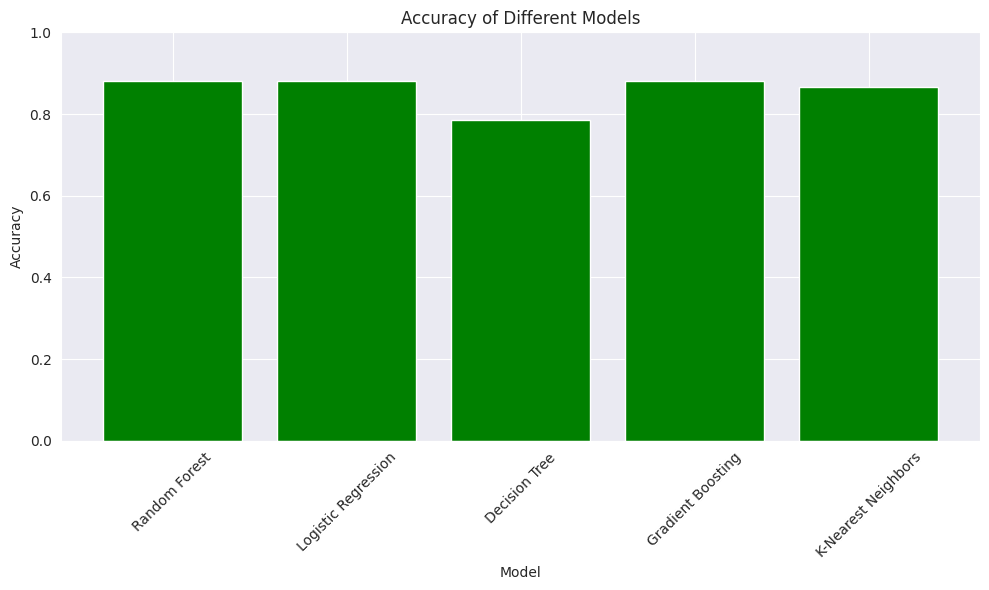

In [113]:
# Create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [114]:
df_clean2['loan_category'].value_counts()

Excellent    410953
Bad           55332
Name: loan_category, dtype: int64

In [115]:
X_o = df_clean2.drop(['loan_category'], axis=1)
y_o = df_clean2['loan_category']

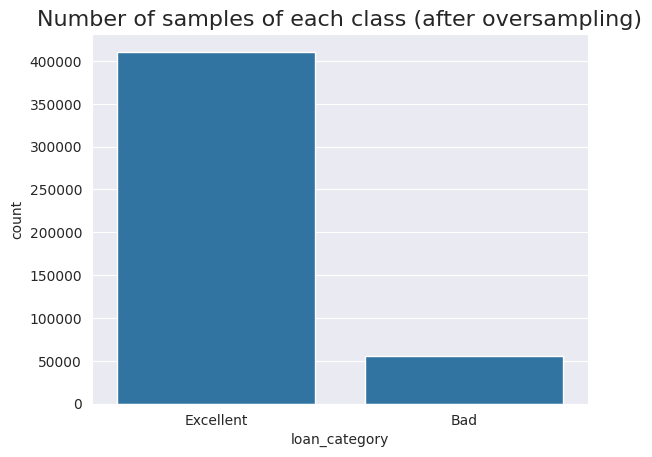

In [116]:

sns.set_style(style='darkgrid')
sns.countplot(data=pd.DataFrame(y_o),x='loan_category')


plt.title('Number of samples of each class (after oversampling)', fontsize=16)
plt.show()

In [117]:
oversample = RandomOverSampler(sampling_strategy = 'not majority')
X_over, y_over = oversample.fit_resample(X_o, y_o)

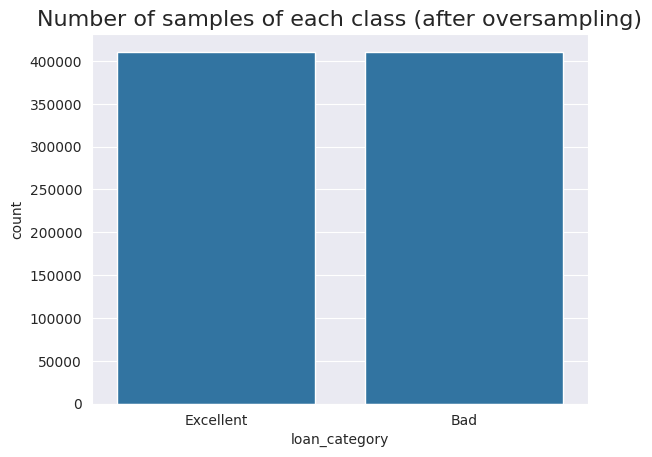

In [118]:
sns.set_style(style='darkgrid')
sns.countplot(data=pd.DataFrame(y_over),x='loan_category')
plt.title('Number of samples of each class (after oversampling)', fontsize=16)
plt.show()

In [119]:
# Split the data into training and testing sets (80% training, 30% testing)
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [120]:
# Impute missing values in X_train_over and X_test_over
imputer = SimpleImputer(strategy='mean')
X_train_over = imputer.fit_transform(X_train_over)
X_test_over = imputer.transform(X_test_over)

In [121]:
# Normalize features
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.fit_transform(X_test_over)

In [122]:
# Initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Initialize dictionary to store classification reports
classification_reports = {}
model_names_over = []
accuracies_over = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_over, Y_train_over)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test_over)

    confusion = confusion_matrix(Y_test_over, Y_pred)
    classification_rep = classification_report(
        Y_test_over, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test_over, Y_pred)

    model_names_over.append(model_name)
    accuracies_over.append(accuracy)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.97      0.95      0.96     81995
         Bad       0.95      0.97      0.96     82387

    accuracy                           0.96    164382
   macro avg       0.96      0.96      0.96    164382
weighted avg       0.96      0.96      0.96    164382

Random Forest Accuracy: 0.9624
Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       0.62      0.65      0.63     81995
         Bad       0.63      0.60      0.62     82387

    accuracy                           0.62    164382
   macro avg       0.62      0.62      0.62    164382
weighted avg       0.62      0.62      0.62    164382

Logistic Regression Accuracy: 0.6242
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recal

In [123]:
model_names_over

['Random Forest',
 'Logistic Regression',
 'Decision Tree',
 'Gradient Boosting',
 'K-Nearest Neighbors']

In [124]:
accuracies_over

[0.9624107262352326,
 0.6241985132192089,
 0.7552408414546605,
 0.6301115693932425,
 0.8177781022253044]

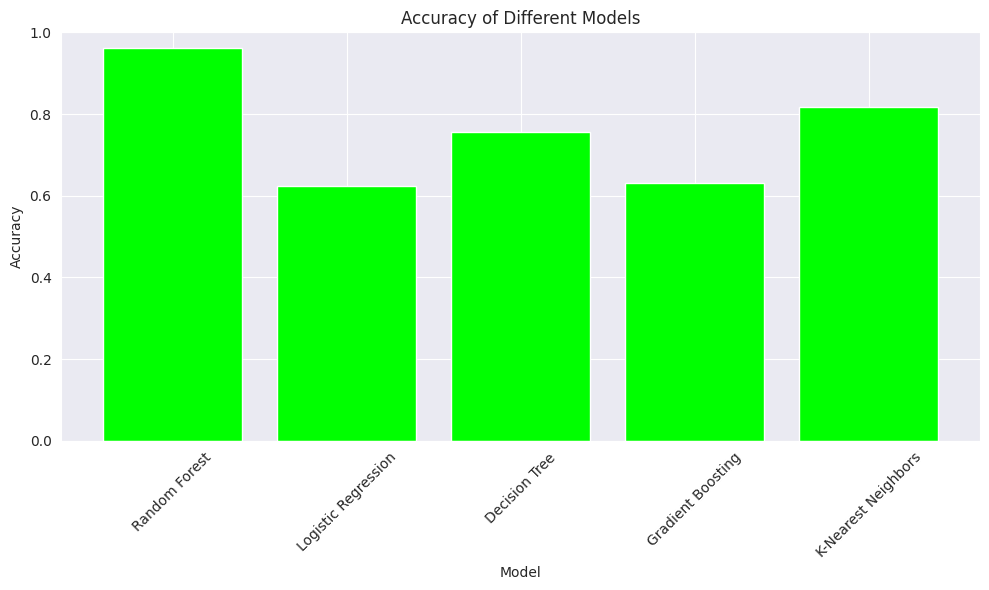

In [125]:
# Create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names_over, accuracies_over, color='lime')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [126]:
accuracies_percent = [round(accuracy * 100) for accuracy in accuracies_over]


In [127]:
# Create a DataFrame for the table
accuracy_table = pd.DataFrame({
    'Model': model_names_over,
    'Accuracy (%)': accuracies_percent
})

In [128]:
print(accuracy_table)

                 Model  Accuracy (%)
0        Random Forest            96
1  Logistic Regression            62
2        Decision Tree            76
3    Gradient Boosting            63
4  K-Nearest Neighbors            82
